# Programming for Data Analysis

## Project 2 - Diamonds dataset simulation

For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.

### Example project idea
As a lecturer I might pick the real-world phenomenon of the performance of students
studying a ten-credit module. After some research, I decide that the most interesting
variable related to this is the mark a student receives in the module - this is going to be
one of my variables (grade).

Upon investigation of the problem, I find that the number of hours on average a
student studies per week (hours), the number of times they log onto Moodle in the
first three weeks of term (logins), and their previous level of degree qualification (qual)
are closely related to grade. The hours and grade variables will be non-negative real
number with two decimal places, logins will be a non-zero integer and qual will be a
categorical variable with four possible values: none, bachelors, masters, or phd.

After some online research, I find that full-time post-graduate students study on average four hours per week with a standard deviation of a quarter of an hour and that
a normal distribution is an acceptable model of such a variable. Likewise, I investigate
the other four variables, and I also look at the relationships between the variables. I
devise an algorithm (or method) to generate such a data set, simulating values of the
four variables for two-hundred students. I detail all this work in my notebook, and then
I add some code in to generate a data set with those properties.


### Problem statement

The purpose of this project is to create a dataset by simulating a real-world phenomenon. Then, rather than collect data related to this phenomenon, such data will be synthesised using Python.
As a real-world phenomenon I've choosen an existing dataset from this resource: [Diamonds dataset](https://www.kaggle.com/shivam2503/diamonds) <br> This dataset contains the prices and other attributes of almost 54,000 diamonds.

### **Content of the initial dataset**:

- **Price** - diamond price in US dollars in range (326-18823)
- **Carat** - weight of diamond (0.2 - 5.01)
- **Cut** - quality of the diamond's cut (Fair, Good, Very good, Premium, Ideal)
- **Clarity** - measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **Length** - length in mm (0 - 10.74)
- **Width** - width in mm (0 - 58.9)
- **Depth** -depth in mm (0--31.8)
- **Table** -  width of top of diamond relative to widest point (43 - 95)

It was decided for this project's purpose to focus on the Ideal diamond cut only. The following variables will be simulated: 
- price
- carat
- length
- width
- depth

The size of the simulated dataset will be fixed to 20000 samples (data ponts).

Let's take a look at the summary of the initial dataset, where diamonds cut is *Ideal*:

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# Importing the tips dataset from the local file
df = pd.read_csv("diamonds_ideal.csv")

# view first 5 rows
df.head()

,price,carat,length,width,depth,cut
0,326,0.23,3.95,3.98,2.43,Ideal
1,340,0.23,3.93,3.90,2.46,Ideal
2,344,0.31,4.35,4.37,2.71,Ideal
3,348,0.30,4.31,4.34,2.68,Ideal
4,403,0.33,4.49,4.51,2.78,Ideal


First, we can use .describe() to view some descriptive facts of the dataset:

In [3]:
df.describe()

,price,carat,length,width,depth
count,21543.000000,21543.000000,21543.000000,21543.000000,21543.000000
mean,3456.454254,0.702695,5.507727,5.518819,3.402192
std,3808.025720,0.432821,1.062848,1.058748,0.655919
min,326.000000,0.200000,3.760000,3.730000,2.300000
25%,878.000000,0.350000,4.540000,4.550000,2.800000
50%,1809.000000,0.540000,5.250000,5.260000,3.230000
75%,4678.000000,1.010000,6.440000,6.440000,3.980000
max,18806.000000,3.500000,9.650000,9.590000,6.030000


Here's a quick breakdown of the above as it relates to this particular dataset:

- _**count**:_ there are 21543 rows in the dataset.
- _**mean**:_ the average value of the variable.
- _**std**:_ the standard deviation. Standard Deviation tells how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are more spread out. 
- _**min**:_ the smallest value in the list of the particular variable
- _**25%**:_ the 25th percentile. Shows that 25% of the data are below this value.
- _**50%**:_ the median, this is the measure of central tendency. To find the median, we arrange the observations in order from smallest to largest value. If there is an odd number of observations, the median is the middle value. If there is an even number of observations, the median is the average of the two middle values.
- _**75%**:_ the 75th percentile. Shows that 75% of the data are below this value.
- _**max**:_ the highest value.

From the descriptive statistics we can see that the initial dataset has 21543 records. The price of the diamonds varies between 326 and 18806 USD. The weight of these diamonds is in range 0.2 - 3.5 carats. The length is similar to its width and varies between 3.7 and 9.6 mm. The range for diamonds depth is between 2.3 and 6.0 mm.

After analysis of the descriptive statistics we can come up with some rules for our simulated dataset:
- price: non-zero positive integer. To be more precised with the simulation, the minimm price of a diamond shouldn't be below 300 USD
- carat: non-zero positive number with two decimal places. Again we will set the min weight for our diamond as per initial dataset - 0.2
- lenght: non-zero positive number with two decimal places. The lower boundary is 3.76 mm
- width: non-zero positive number with two decimal places. The lower boundary is
- depth: non-zero positive number with two decimal places. The lower boundary is

For easier calculation our simulated dataset will contain 20000 records.

Also we can visually represent the distribution of the variables using a `histogram`.

Histogram below shows frequency distribution for a Price and Carat in an initial dataset.

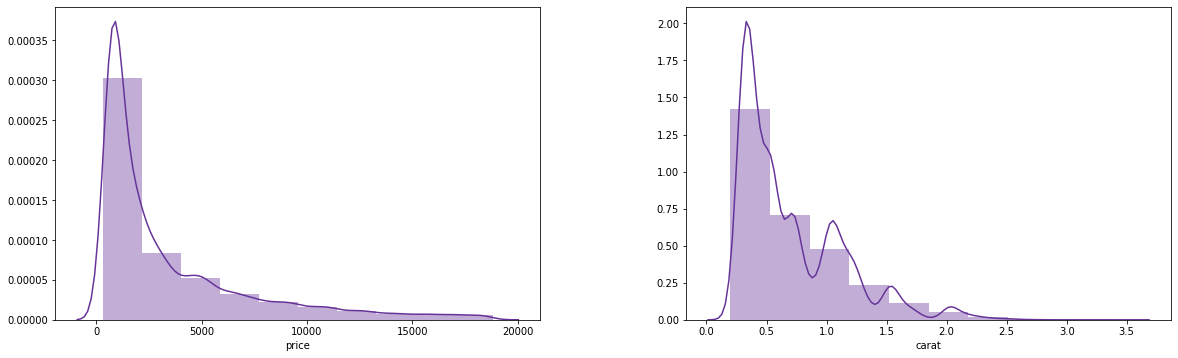

In [4]:
fig1 = plt.figure(figsize=(20,6))
fig1.subplots_adjust(top=0.85, wspace=0.3)

# 1 row, 3 columns, and we'd like the first element.
ax1 = plt.subplot(1, 2, 1)
sns.distplot(df['price'], ax=ax1, color="rebeccapurple", bins = 10)

# 1 row, 2 columns, and we'd like the second element.
ax2 = plt.subplot(1, 2, 2)
sns.distplot(df['carat'], ax=ax2, color="rebeccapurple", bins = 10)

Now let's plot the measurements of the diamonds (Length, Width and Depth):

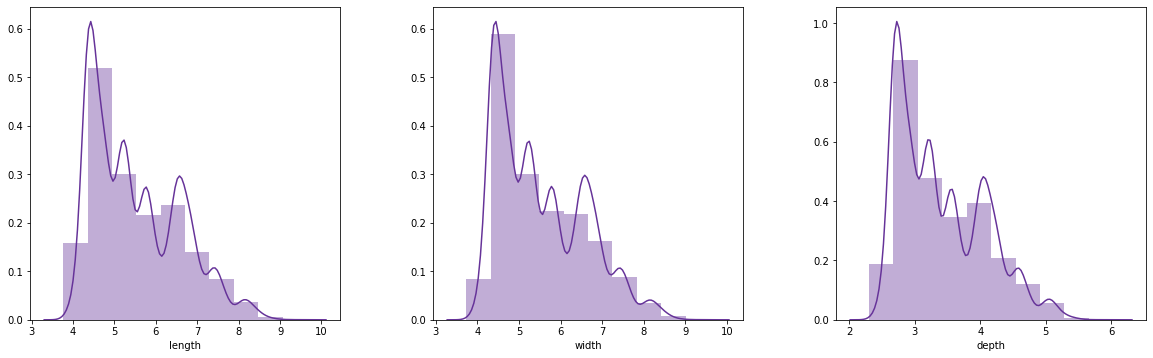

In [5]:
fig2 = plt.figure(figsize=(20,6))
fig2.subplots_adjust(top=0.85, wspace=0.3)

# 1 row, 3 columns, and we'd like the first element.
ax3 = plt.subplot(1, 3, 1)
sns.distplot(df['length'], ax=ax3, color="rebeccapurple", bins = 10)

# 1 row, 2 columns, and we'd like the second element.
ax4 = plt.subplot(1, 3, 2)
sns.distplot(df['width'], ax=ax4, color="rebeccapurple", bins = 10)

# 1 row, 2 columns, and we'd like the third element.
ax5 = plt.subplot(1, 3, 3)
sns.distplot(df['depth'], ax=ax5, color="rebeccapurple", bins = 10)

## Price

In this section we will be looking closer at the first measure - price and the way how we are going to synthesise it.

Looking at the Price histogram above, we can notice that the histogram is in a shape of the gamma-distribution. `Gamma distribution` is a right skewed distribution used for continuous variables. This is due to its flexibility in the choice of the shape and scale parameters. The scale parameter determines where the bulk of the observations lies and the shape parameter determines how the distribution will look. E.g.:

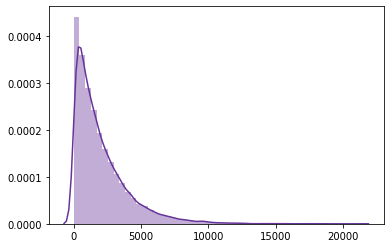

In [6]:
gamma = np.random.gamma(1, 2000, 20000)
sns.distplot(gamma, color="rebeccapurple")

The graph above is just random gamma-distribution, and here is our histogram of the price:

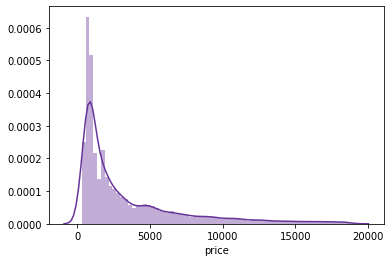

In [7]:
sns.distplot(df['price'], color="rebeccapurple", bins = 70)

The first plot is an example of the ideal gamma-distribution plotting. Even though that we can clearly see some similarities with the second plot, they are not the same. To make it more realistic and close to our initial price distribution, we will add some random numbers to our gamma-distribution dataset using numpy.random.normal function

In [8]:
s_price = np.random.gamma(1.2, 150, 20000).astype(np.int)+ np.random.normal(0.0, 6000, 20000).astype(np.int)

As per our set of the requirements for the simulated price, the price cannot be below 300 USD. Let's check what we got:

In [9]:
print('Minimum price: ' + str(np.amin(s_price).round(2)))

Minimum price: -23318


Now let's transform all prices that are below 300 USD range into the prices in range [300 - 2500], as looking at the initial price histogram, we can clearly see that the most of the prices are distribuded within this range.

In [10]:
s_price[s_price < 300] = np.random.uniform(300, 2500, len(s_price[s_price < 300]))

Let's check the minimum price again - now it shouldn't be below 300 USD:

In [11]:
print('Minimum price: ' + str(np.amin(s_price).round(2)))

Minimum price: 300


Time to visualize our simulated price:

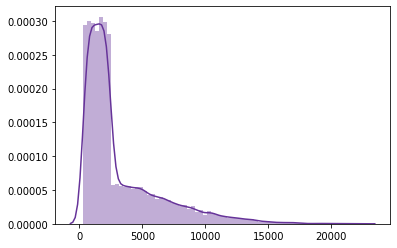

In [12]:
sns.distplot((s_price), color="rebeccapurple", bins = 70)

If we won't take into consideration a huge spike of the low prices distribution in the initial Price diagram, we got quite simular plot with smoother boudaries. Let's check what is the mean and the standard deviation of the simulated price:

In [13]:
sim_mean_p = np.mean(s_price).astype(np.int)
sim_std_p = np.std(s_price).astype(np.int)

print('Mean: ' + str(sim_mean_p))
print('Standard deviation: ' + str(sim_std_p))

Mean: 3199
Standard deviation: 3151


If we compare the Mean and Standard deviation of the simulated price with the actual price (Mean = 3457, Std = 3808), we could see that there's only a small difference in these values.

Therefore we can assume that our simulated price is close enough to the actual data.

## Length

Now we can go to the next variable - diamond length. We have already looked at the Price variable and have simulated this measure. Let's see if there is any correlation between the length and the price. For this purpose we will use seaborn plotting capabilities.

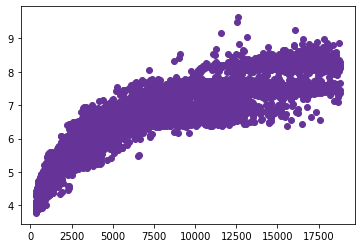

In [16]:
plt.scatter(df['price'], df['length'], color="rebeccapurple")

From the plot above we can clearly see that price depends on the length. 

Let's try to fit a best line into this correlation. For this purpose we will be using `scipy.optimize.curve_fit`. As the straigh line won't fit our correlation graph, we will be fitting a logarithmic curve (`y = a + b * log(x)`), wich should suit our purpose much better than the straight line.

In [17]:
x_p = df['price']
y_l = df['length']

scipy.optimize.curve_fit(lambda t, a, b: a + b*np.log(t),  x_p,  y_l)

(array([-2.36400835,  1.03044792]), array([[ 2.35643034e-04, -3.03350295e-05],
        [-3.03350295e-05,  3.97100067e-06]]))

The first array contains **a** and **b** values (-2.36435806 and 1.03049703, respectively), that we're going to use to build our best fit line. Let's put our **a** and **b** values that we got earlier into a logarithmic curve formula: y = a + b * log(x). The forlmula for **y** values of the best fit line is: `y ≈ -2.36435806 + 1.03049703 * log(x)`

Now we can update our correlation plot with the best fit line.

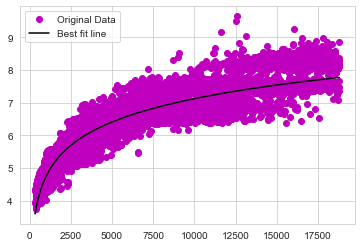

In [98]:
plt.figure()

# Plot price versus length with black dots.
plt.plot(x_p, y_l, 'mo', label = "Original Data")

# Overlay the best fit line on the plot.
# provide the limits for x1 (min price & max price)
x = np.arange(326, 18806, 1)
plt.plot(x, -2.36435806 + 1.03049703 * np.log(x), 'k-', label=r"Best fit line")
plt.legend()
plt.show()

Based on the graph, we are ok to take the best fit line to simulate the diamond length values. We will be using formula of the best fit line and adding some random numbers from **random.uniform** distribution:

In [19]:
s_length = (-2.36435806 + 1.03049703 * np.log(s_price)) + np.random.normal(0.0, 0.7, s_price.size)

Let's check the minimum and maximum values we got in our simulted lenght:

In [20]:
print('Minimum length: ' + str(np.amin(s_length).round(2)))
print('Maximum length: ' + str(np.amax(s_length).round(2)))

Minimum length: 1.66
Maximum length: 9.64


If we check the min and max for our initial lenght, we can notice that the frames of the simulated lenght are wider.

In [21]:
df['length'].describe()

count    21543.000000
mean         5.507727
std          1.062848
min          3.760000
25%          4.540000
50%          5.250000
75%          6.440000
max          9.650000
Name: length, dtype: float64

Therefore we will add the boudaries by putting the folowing rule in place:
- if the length is lower than 3.76 replace it with any random number from the normal distribution (with a mean = 4 and standard deviation = 0.1)

In [22]:
s_length[s_length < 3.76] = np.random.normal(4, 0.1, len(s_length[s_length < 3.76]))

Let's check the minimum length again:

In [99]:
print('Minimum length: ' + str(np.amin(s_length).round(2)))

Minimum length: 3.69


Now looks much better. Let's compare the Mean and a Standard Deviation of the initial length and the simulated:

In [101]:
sim_mean_l = np.mean(s_length).round(2)
sim_std_l = np.std(s_length).round(2)

print('Mean of the simulated length: ' + str(sim_mean_l))
print('Standard deviation of the simulated length: ' + str(sim_std_l))

Mean of the simulated length: 5.57
Standard deviation of the simulated length: 1.09


The itial mean is 5.51 and standard deviation is 1.06. The value of simulated figures are close to the initial ones.

## Width

In [42]:
df['width'].describe()

count    21543.000000
mean         5.518819
std          1.058748
min          3.730000
25%          4.550000
50%          5.260000
75%          6.440000
max          9.590000
Name: width, dtype: float64

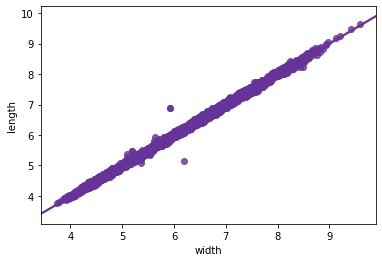

In [43]:
sns.regplot('width', 'length', data=df, color="rebeccapurple")

From the graph above we can clearly see the positive linear correlation between length and width. The way *the best fit line* fits the model, we can tell that the width is equal the length (as the graph shows that y = x). In this case we will simulate the width data by taking simulated length and adding some small random numbers from **random.normal** distribution.

In [44]:
s_width = s_length + np.random.normal(0.0, 0.01, s_length.size)

Let's calculate the min, max, mean and standard deviation of the simulated width.

In [45]:
print('Minimum width: ' + str(np.amin(s_width).round(2)))
print('Maximum width: ' + str(np.amax(s_width).round(2)))

sim_mean_w = np.mean(s_width).round(2)
sim_std_w = np.std(s_width).round(2)

print('Mean of simulated width: ' + str(sim_mean_w))
print('Standard deviation of simulated width: ' + str(sim_std_w))

Minimum width: 3.68
Maximum width: 9.65
Mean of simulated width: 5.57
Standard deviation of simulated width: 1.09


The comparison of min, max, mean and standard deviation is almost the same as for initial width dataset.

# Width done - third variable done

# Depth

In [46]:
df['depth'].describe()

count    21543.000000
mean         3.402192
std          0.655919
min          2.300000
25%          2.800000
50%          3.230000
75%          3.980000
max          6.030000
Name: depth, dtype: float64

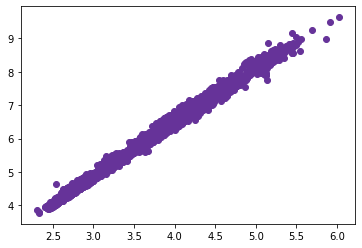

In [47]:
plt.scatter(df['depth'], df['length'], color="rebeccapurple")

The graph above also shows a positive linear correlation between length and depth. Let's try to fit *a best fit line*. First we need to calculate the slope(m) and y-intercept(c):

In [48]:
l = df['length']
d = df['depth']

# First calculate the means of w and d.
l_avg = np.mean(l)
d_avg = np.mean(d)

# Subtract means from w and d.
l_zero = l - l_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(l_zero * d_zero) / np.sum(l_zero * l_zero)
# Use m from above to calculate the best c.
c = d_avg - m * l_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.615852 and c is 0.010246.


We can calculate slope and y-intercept using sns.polyfit function. Let's check if we will get the same numbers:

In [49]:
np.polyfit(l, d, 1)

array([0.61585221, 0.01024587])

As you can see the slope and y-intercept values are exactly the same. Now let's plot our line (`y = 0.61527133 * x + 0.01297997`):

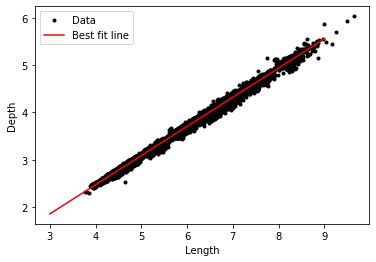

In [50]:
#Plot w versus d with black dots.
plt.plot(l, d, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(3.0, 9.5, 1.0)
plt.plot(x, m * x + c, 'r-', label=r"Best fit line")


# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Length')
plt.ylabel('Depth')

# Show the plot.
plt.show()

Now we will simulate the depth data by using our best fit line formula plus some random noise using **random.normal** distribution.

In [51]:
s_depth = (0.61527133 * (s_length) + 0.01297997) + np.random.normal(0.0, 0.05, s_length.size)

Calculating min, max, mean and standard deviation for the simulated length:

In [52]:
print('Minimum depth: ' + str(np.amin(s_depth).round(2)))
print('Maximum depth: ' + str(np.amax(s_depth).round(2)))

sim_mean_d = np.mean(s_depth).round(2)
sim_std_d = np.std(s_depth).round(2)

print('Mean of simulated depth: ' + str(sim_mean_d))
print('Standard deviation of simulated depth: ' + str(sim_std_d))

Minimum depth: 2.22
Maximum depth: 5.94
Mean of simulated depth: 3.44
Standard deviation of simulated depth: 0.67


If we compare thse values to the initial dataset, we will see that the difference is minimal. Let's visualize correlation between length and depth (initial vs simulated):

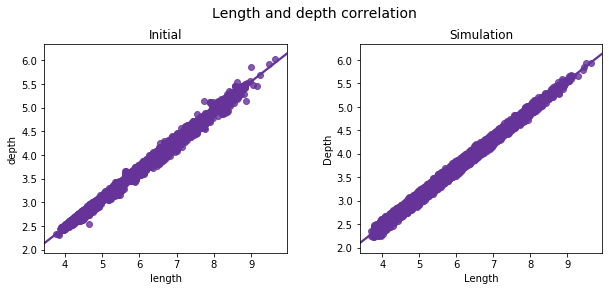

In [53]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Length and depth correlation", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Initial")
ax1.set_xlabel("Length")
ax1.set_ylabel("Depth") 
#sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')
sns.regplot('length', 'depth', data=df, ax=ax1, color="rebeccapurple")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Simulation")
ax2.set_xlabel("Length")
ax2.set_ylabel("Depth") 
sns.regplot(s_length, s_depth, ax=ax2, color="rebeccapurple")

These two plots looks very similar (excluding few outliers in the Initial sub-plot).

# Depth done

# Carat

## distribution plots are not the same

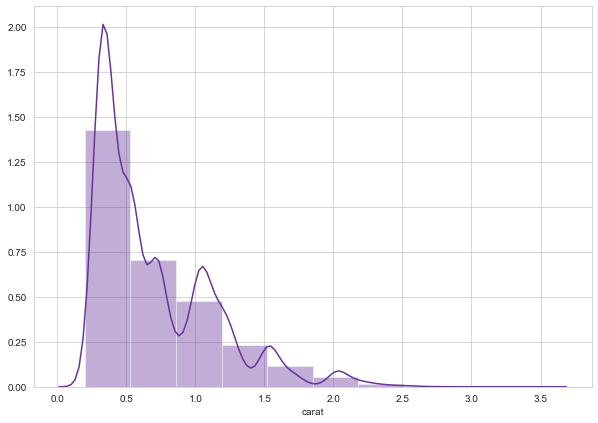

In [54]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,1,1)
sns.distplot(df['carat'], color="rebeccapurple", bins = 10)

In [55]:
df['carat'].describe()

count    21543.000000
mean         0.702695
std          0.432821
min          0.200000
25%          0.350000
50%          0.540000
75%          1.010000
max          3.500000
Name: carat, dtype: float64

Let’s see how we can estimate the diamond weight (carats) by looking at its measurements. There is a formula to calculate the diamond estimate weight:
Estimated weight = Lenght * Width * Depth * Coefficient

Coefficient usually varies between 0.0057 & 0.0066 depending on the diamond shape, 

In [56]:
# for coefficient calculation is used random.uniform distribution in range between 0.0057 & 0.0066
s_carat = s_length * s_width * s_depth * np.random.uniform(0.0057, 0.0066, s_length.size)

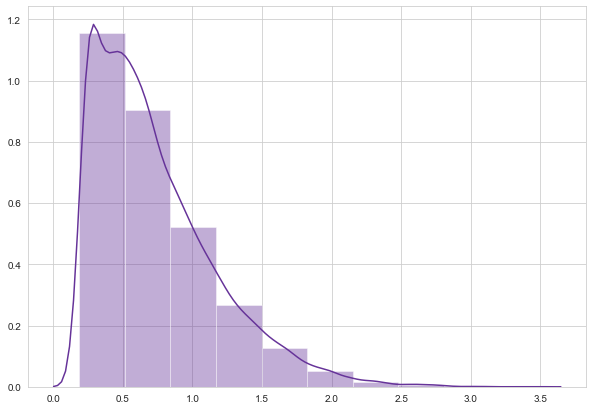

In [57]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,1,1)
sns.distplot(s_carat, color="rebeccapurple", bins = 10)

In [58]:
print('Minimum carat: ' + str(np.amin(s_carat).round(2)))
print('Maximum carat: ' + str(np.amax(s_carat).round(2)))

sim_mean_c = np.mean(s_carat).round(2)
sim_std_c = np.std(s_carat).round(2)

print('Mean of simulated carat: ' + str(sim_mean_c))
print('Standard deviation of simulated carat: ' + str(sim_std_c))

Minimum carat: 0.19
Maximum carat: 3.46
Mean of simulated carat: 0.73
Standard deviation of simulated carat: 0.44


Comparing min, max, mean and standard deviation of the simulated carats versus initial measurements, we see that there is no big variance between two measurement sets.

# Testing dependancies

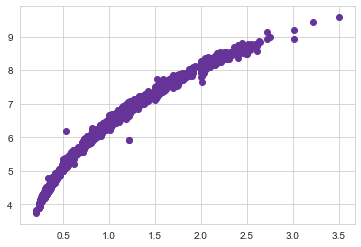

In [59]:
plt.scatter(df['carat'], df['width'], color="rebeccapurple")

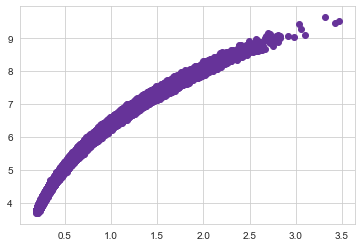

In [60]:
plt.scatter(s_carat, s_width, color="rebeccapurple")

# wrong, doesn work as required

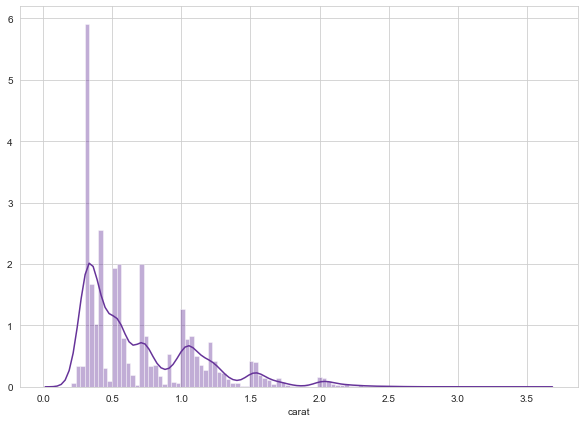

In [61]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,1,1)
sns.distplot(df['carat'], color="rebeccapurple", bins = 100)

In [62]:
df['carat'].describe()

count    21543.000000
mean         0.702695
std          0.432821
min          0.200000
25%          0.350000
50%          0.540000
75%          1.010000
max          3.500000
Name: carat, dtype: float64

In [63]:
s_carat = np.random.poisson(1, 20000)/2 + np.random.normal(0.0, 0.1, s_length.size)

In [64]:
s_carat[s_carat<0.2] = np.random.uniform(0.25, 0.35, len(s_carat[s_carat<0.2]))

In [65]:
print('Minimum carat: ' + str(np.amin(s_carat).round(2)))
print('Maximum carat: ' + str(np.amax(s_carat).round(2)))

sim_mean_c = np.mean(s_carat).round(2)
sim_std_c = np.std(s_carat).round(2)

print('Mean of simulated carat: ' + str(sim_mean_c))
print('Standard deviation of simulated carat: ' + str(sim_std_c))

Minimum carat: 0.2
Maximum carat: 3.58
Mean of simulated carat: 0.61
Standard deviation of simulated carat: 0.41


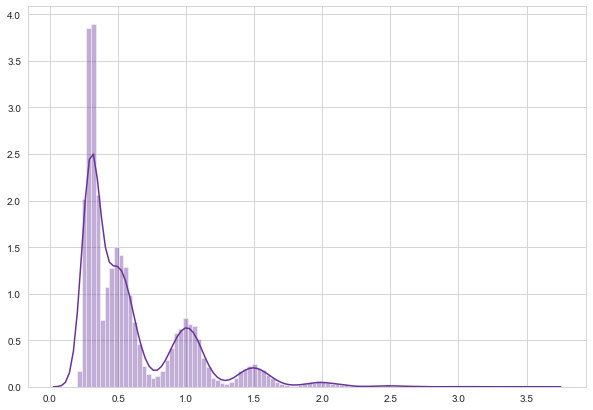

In [66]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,1,1)
sns.distplot(s_carat, color="rebeccapurple", bins = 100)

# Carat done

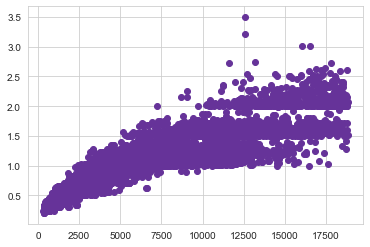

In [67]:
plt.scatter(df['price'], df['carat'], color="rebeccapurple")

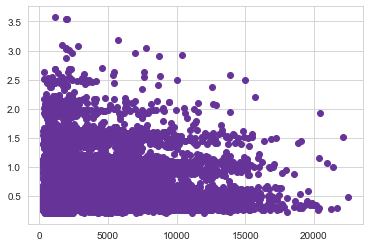

In [68]:
plt.scatter(s_price, s_carat, color="rebeccapurple")

# Stops here

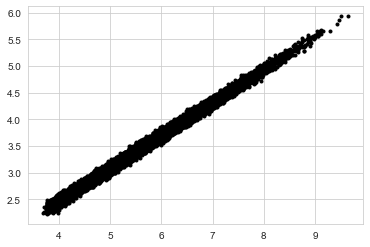

In [69]:
plt.plot(s_length, s_depth, 'k.', label="Data")

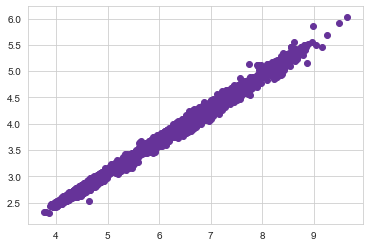

In [70]:
plt.scatter(df['length'], df['depth'], color="rebeccapurple")

In [71]:
np.std(s_width).round(2)

1.09

In [72]:
x = np.random.normal(0.0, 0.1, s_length.size)

In [73]:
np.amin(x)

-0.35930636189971654

In [74]:
np.amax(x)

0.3978577710225828

In [75]:
np.mean(x)

-0.00012713913983616995

In [76]:
np.std(x)

0.09935531921797128

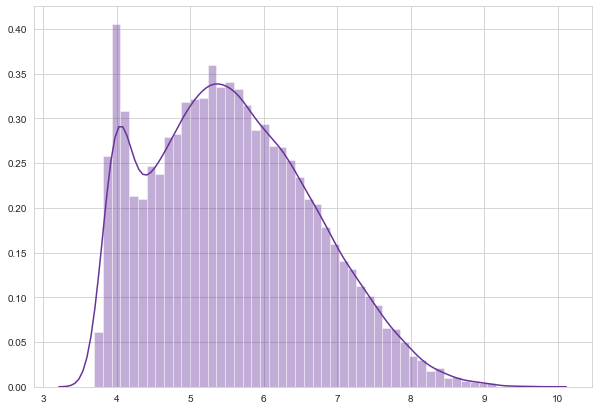

In [77]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,1,1)
sns.distplot(s_length, color="rebeccapurple", bins = 50)

## WEIGHT AND DEPTH

In [78]:
w = df['width']
d = df['depth']

Finding the best fir line (calculating slope (m) and y intercept (c))

In [79]:
# Calculate the best values for m and c.

# First calculate the means of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.618075 and c is -0.008850.


In [80]:
np.polyfit(w, d, 1)

array([ 0.6180746 , -0.00885003])

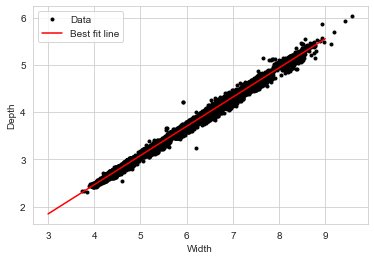

In [81]:
#Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(3.0, 9.5, 1.0)
plt.plot(x, m * x + c, 'r-', label=r"Best fit line")


# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Width')
plt.ylabel('Depth')

# Show the plot.
plt.show()

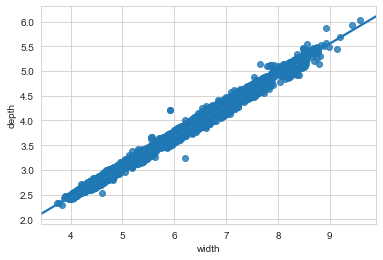

In [82]:
sns.regplot(x="width", y="depth", data=df)

In [83]:
pois= np.random.exponential(0.5, s_price.size)

In [84]:
print(np.amin(pois))
print(np.amax(pois))

1.7455808253562323e-05
4.518253290075259


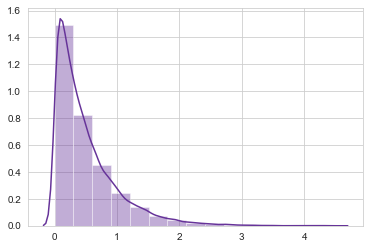

In [85]:
sns.distplot(pois, color="rebeccapurple", bins = 15)

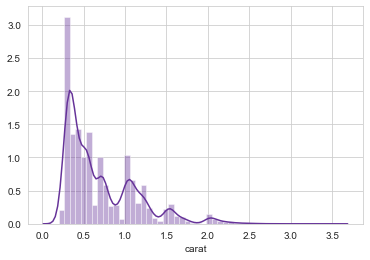

In [86]:
sns.set_style("whitegrid")
#fig = plt.figure(figsize=(10,7))
#fig.add_subplot(1,1,1)
sns.distplot(df['carat'], color="rebeccapurple", bins = 50)

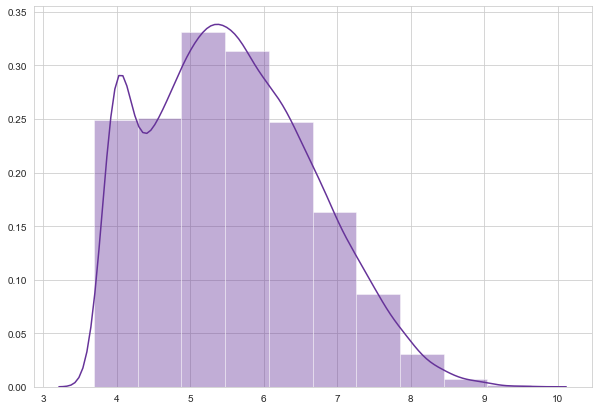

In [87]:
fig = plt.figure(figsize=(10,7))
sns.distplot((s_length), color="rebeccapurple", bins = 10)

In [88]:
log_data = np.log(s_length)

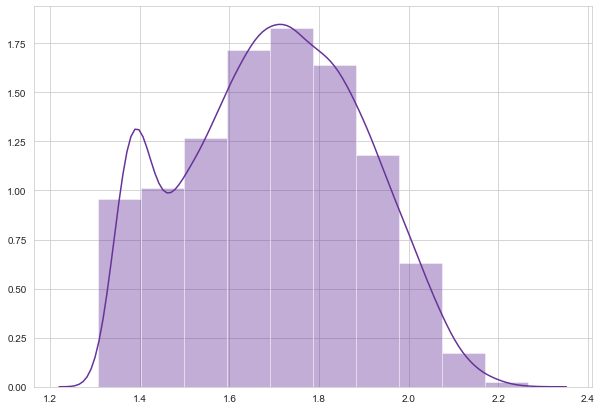

In [89]:
fig = plt.figure(figsize=(10,7))
sns.distplot((log_data), color="rebeccapurple", bins = 10)

In [90]:
test = np.random.gamma(3, 1, 20000)

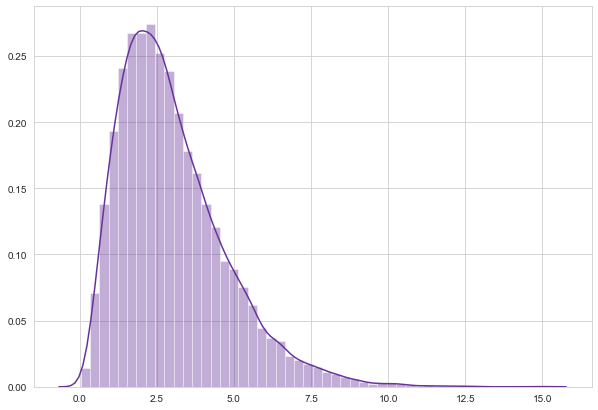

In [91]:
fig = plt.figure(figsize=(10,7))
sns.distplot((test), color="rebeccapurple")

In [92]:
log_data = np.log(data)

NameError: name 'data' is not defined

In [ ]:
sim_mean_p = np.mean(s_price).astype(np.int)
sim_std_p = np.std(s_price).astype(np.int)

print('Mean: ' + str(sim_mean_p))
print('Standard deviation: ' + str(sim_std_p))

# Stops here

In [ ]:
df['length'].describe()

In [ ]:
df['width'].describe()

In [ ]:
sns.set_style("whitegrid")
#fig = plt.figure(figsize=(10,7))
#fig.add_subplot(1,1,1)
sns.distplot(df['length'], color="rebeccapurple", bins = 10)

In [ ]:
sns.set_style("whitegrid")
#fig = plt.figure(figsize=(10,7))
#fig.add_subplot(1,1,1)
sns.distplot(df['depth'], color="rebeccapurple", bins = 20)

If we check the mean, standard deviation and other paramenters from .describe(), we can notice that length and width has almost the same values, therefore are distributed identically.

Let's look at the correlation between these two attributes.

In [ ]:
plt.scatter(df['length'], df['width'], color="rebeccapurple")

From the plot above we can see that there is a perfect linear correlation between lenght and weight. Let's figure out the best fit line.

In [ ]:
w = df['width']
l = df['length']

In [ ]:
# Calculate the best values for m and c.

# First calculate the means of w and d.
l_avg = np.mean(l)
w_avg = np.mean(w)

# Subtract means from w and d.
l_zero = l - l_avg
w_zero = w - w_avg

# The best m is found by the following calculation.
m = np.sum(l_zero * w_zero) / np.sum(l_zero * l_zero)
# Use m from above to calculate the best c.
c = w_avg - m * l_avg

print("m is %8.6f and c is %6.6f." % (m, c))

Now we got a function y = 0.995319 * x + 0.036870

In [ ]:
np.polyfit(l, w, 1)

The

In [ ]:
np.polyfit(w, l, 1)

## PRICE AND LENGHT

In [ ]:
plt.scatter(df['depth'], df['length'], color="rebeccapurple")

In [ ]:
sns.regplot('length', 'width', data=df)

In [ ]:
p = df['price']
l = df['length']

Finding the best fir line (calculating slope (m) and y intercept (c))

In [ ]:
# Calculate the best values for m and c.

# First calculate the means of w and d.
p_avg = np.mean(p)
l_avg = np.mean(l)

# Subtract means from w and d.
p_zero = p - p_avg
l_zero = l - l_avg

# The best m is found by the following calculation.
m_pl = np.sum(p_zero * l_zero) / np.sum(p_zero * l_zero)
# Use m from above to calculate the best c.
c_pl = l_avg - m_pl * p_avg

print("m is %8.6f and c is %6.6f." % (m_pl, c_pl))

In [ ]:
np.polyfit(p, l, 2)

In [ ]:
B, A = np.polyfit(p, np.log(l), 1) 

In [ ]:
B

In [ ]:
A

In [ ]:
B*x

In [ ]:
A*np.e

In [ ]:
y = A*np.e**(B*x)

In [ ]:
y

In [ ]:
#-1.80750353e-08 * x**2 + 5.01767929e-04 * x +  4.25142800e+00

In [ ]:
#Plot w versus d with black dots.
#plt.plot(p, l, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(0, 25000, 2500)
plt.plot(x, A*np.e**(B*x), 'r-', label=r"Best fit line")
#plt.plot(x, np.sqrt(x) - 140, 'r-', label=r"Best fit line")
#y = Ae^(Bx)

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Price')
plt.ylabel('Length')

# Show the plot.
plt.show()

In [ ]:
s_price

In [ ]:
df['depth'].describe()

In [ ]:
df['carat'].describe()

In [ ]:
chi_sqr = np.random.noncentral_chisquare(1.6, 0.1, 20000)*1000

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.distplot(chi_sqr)

In [ ]:
sim_mean_p = np.mean(chi_sqr)
sim_std_p = np.std(chi_sqr)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p))

In [ ]:
chi_sqr = np.random.noncentral_chisquare(3.8, .01, 10000)*1000
fig = plt.figure(figsize=(10,7))
sns.distplot(chi_sqr)

In [ ]:
sim_mean_p = np.mean(chi_sqr)
sim_std_p = np.std(chi_sqr)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p))

In [ ]:
df['price'].describe()

In [ ]:
noise = np.random.normal(0.0, 200, chi_sqr.shape)

In [ ]:
noise

In [ ]:
gm = np.random.gamma(2.0, 2400, 10000)
fig = plt.figure(figsize=(10,7))
sns.distplot(gm)

# testng gamma and chi square

In [ ]:
chi_sqr = np.random.noncentral_chisquare(2.5, 0.00001, 20000)*1000

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.distplot(chi_sqr)

In [ ]:
sim_mean_p = np.mean(chi_sqr)
sim_std_p = np.std(chi_sqr)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p))

In [ ]:
chi_sqr = np.random.noncentral_chisquare(3.8, 1, 10000)*1000 + np.random.normal(0.0, 500, 10000)

In [ ]:
chi_sqr[chi_sqr<340] =  np.random.uniform(340, 18806 + 1, len(chi_sqr[chi_sqr<340]))

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.distplot(chi_sqr)

In [ ]:
sim_mean_p = np.mean(chi_sqr)
sim_std_p = np.std(chi_sqr)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p))

In [ ]:
df['price'].describe()

In [ ]:
gamma = np.random.gamma(2.0, 2300, 10000) + np.random.normal(0.0, 500, gamma.shape)

In [ ]:
gamma[gamma<340] = np.random.uniform(340, 18806 + 1, len(gamma[gamma<340]))

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.distplot(gamma)

In [ ]:
sim_mean_p1 = np.mean(gamma)
sim_std_p1 = np.std(gamma)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p1))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p1))

# end

In [ ]:
df['price'].describe()

In [ ]:
gamma = np.random.gamma(2.3, 2000, 10000) + np.random.normal(0.0, 200, gamma.shape)
fig = plt.figure(figsize=(10,7))
sns.distplot(gamma)

In [ ]:
sim_mean_p1 = np.mean(gamma)
sim_std_p1 = np.std(gamma)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p1))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p1))

In [ ]:
df['carat'].describe()

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['carat'], color="rebeccapurple", bins = 20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [ ]:
df['depth'].describe()

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['depth'], color="rebeccapurple")

In [ ]:
df['length'].describe()

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['length'], color="rebeccapurple")

In [ ]:
df['width'].describe()

In [ ]:
sns.set_style("whitegrid")
sns.distplot(df['width'], color="rebeccapurple")

In [ ]:
plt.scatter(df['price'], df['carat'], color="rebeccapurple")

In [ ]:
plt.scatter(df['width'], df['depth'], color="rebeccapurple")

In [ ]:
plt.scatter(df['width'], df['length'], color="rebeccapurple")

In [ ]:
#plt.axis([0, 6, 0, 20])
plt.scatter(df['length'], df['depth'], color="rebeccapurple")

In [ ]:
plt.scatter(df['price'], df['length'], color="rebeccapurple")

In [ ]:
plt.scatter(df['price'], df['width'], color="rebeccapurple")

In [ ]:
plt.scatter(df['price'], df['depth'], color="rebeccapurple")

In [ ]:
plt.scatter(df['price'], df['carat'], color="rebeccapurple")

In [ ]:
plt.scatter(df['carat'], df['length'], color="rebeccapurple")

In [ ]:
plt.scatter(df['carat'], df['width'], color="rebeccapurple")

In [ ]:
plt.scatter(df['carat'], df['depth'], color="rebeccapurple")

In [ ]:
#set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
sns.distplot(df['width'], color="rebeccapurple", bins = int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
plt.hist(df['width'], color = 'blue', edgecolor = 'black', bins = int(180/5))

In [ ]:
sns.distplot(df['width'], bins = int(180/5))

# Testing cases

In [ ]:
from scipy.stats import expon
from scipy.stats import poisson

In [ ]:
data_expon = expon.rvs(scale=1,loc=0,size=1000)

fig = plt.figure(figsize=(10,7))
ax = sns.distplot(data_expon, bins=100)
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

In [ ]:
g_shape, g_scale, g_size = 1, 2, 100000
gamma = np.random.gamma(g_shape, g_scale, g_size)
sns.distplot(gamma)

In [ ]:
gamma = np.random.gamma(2.0, 2200, 10000) + np.random.normal(0.0, 500, 10000)

In [ ]:
gamma[gamma<340] = np.random.randint(340, 18806 + 1)
#gamma

In [ ]:
sim_mean_p1 = np.mean(gamma)
sim_std_p1 = np.std(gamma)

print('Mean of the simulated diamond length values: ' + str(sim_mean_p1))
print('Standard deviation of the simulated diamond length values: ' + str(sim_std_p1))

In [ ]:
df['price'].describe()

In [ ]:
#gammat = np.random.gamma(2.0, 2000, 10000)
fig = plt.figure(figsize=(10,7))
sns.distplot(gamma)

In [ ]:
# Importing the tips dataset from the local file
df = pd.read_csv("diamonds_full.csv")
df.head()

In [ ]:
df1 = df.loc[df.loc[:, 'cut'] == 'Ideal']

In [ ]:
df1.head()

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,7))
fig.add_subplot(1,1,1)
sns.distplot(df1['price'], color="rebeccapurple", bins = 100)

In [ ]:
df1['price'].describe()

In [ ]:
chi_sqr = np.random.noncentral_chisquare(2.5, 0.00001, 21551)*1000

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.distplot(chi_sqr)

In [ ]:
np.polyfit(l, w, 2)

In [ ]:
from pylab import *
from scipy.optimize import curve_fit

In [ ]:
x = df['length']
y = df['price']

In [ ]:
x = np.array(df['length'])
x

In [ ]:
from pylab import *
from kapteyn import kmpfit

## References:

https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.curve_fit.html